In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd

from agent import DDPG
from task import Task

In [2]:
init_pose = np.array([1.0, 1.0, 0.3, 1, 1])
target_pos = np.array([9.5, 9.5])
task = Task(init_pose=init_pose, target_pos=target_pos)
agent = DDPG(task)
x_obs = np.array([3, 5, 8.5, 11, 13])
y_obs = np.array([3, 5, 8.5, 11, 13])

resultsAll = []
high_score = 10000
low_score = -10000

training_results = {
    'score': []
}
num_episodes = 1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


1.501810111976935
-0.3987193036187703
-0.3864083109557258
-0.3795471953463133
-0.3764160995197313
-0.3756995358825316
-0.39664118135035886
-0.39445197078712047
-0.40131556562722304
-0.4126374122842419
-0.40133797103701185
-0.3969876904980566
-0.3917315577883288
-0.3939066741068039
-0.3833732376931319
-0.3893206654764899
-0.3923198828160611
-0.3949728347186342
-0.404042107384614
-0.4087878793116134
-0.41017253543690513
-0.41341628803625363
-0.39895610401269843
-0.3963335496786037
-0.4067725914772792
-0.4203956671890271
-0.4048748001107748
-0.40872960870041053
-0.4094221419583718
-0.41783781815141585
-0.4161423515491046
-0.41317492676743706
-0.4176752760416921
-0.4191946550096709
-0.42018158702727193
-0.431079979017181
-0.43440086260152044
-0.43063360748498825
-0.42857650848901707
-0.4323772446076427
-0.4276632535193453
-0.4275905089139499
-0.4244008064948316
-0.42573238088034626
-0.41814944749887883
-0.43030085392714434
-0.4143545099172877
-0.41546590807290096
-0.3957599861116531
-0.387

-0.4024399795847099
-0.39982442263136464
-0.39889995510772225
-0.3905861712030875
-0.39172461016647764
-0.4040950268874418
-0.40061828520105125
-0.41011170254417395
-0.4083420952435247
-0.41092347522328276
-0.4060502109931686
-0.4093555529906826
-0.4047726815051659
-0.39898140735027565
-0.3936861923417453
-0.4100481390760823
-0.39193731040989055
-0.39435636979121946
-0.39067585795193904
-0.3879166695492703
-0.3853317747252353
-0.37696344813892
-0.3829261567740353
-0.3786381684217609
-0.3727159178470675
-0.3731068461152377
-0.3783800650793795
-0.39731592806016847
-0.39366362031875857
-0.3936395054017966
-0.40267439729644783
-0.4207080388675747
-0.4245064291186361
-0.41171544382360137
-0.4048158001520189
-0.4152188902979196
-0.42258173485056927
-0.41153043903228015
-0.4182616255455732
-0.40510634515878985
-0.40232924853505503
-0.39651318602639785
-0.3994956603816927
-0.39655866905831194
-0.3903236828497011
-0.39539555653721814
-0.3881086883898769
-0.3876811730841897
-0.39552641791188525


-0.39040366839784324
-0.3866410003273554
-0.3882765131698006
-0.3856814073142226
-0.38390726404421593
-0.38611543914878366
-0.39308477818192544
-0.4015853923120293
-0.40681954509048734
-0.41693572393013356
-0.4197386900137733
-0.4092024538637625
-0.41673692589078326
-0.4172905286343317
-0.40985760921919334
-0.4048005977565937
-0.39992611805896094
-0.4220103534713612
-0.4184521167638232
-0.4124109903464429
-0.42299892711167464
-0.4247005874822042
-0.4178738580568865
-0.4195958134842831
-0.4212149988622039
-0.42379638594834945
-0.4168666947023997
-0.42625349502685805
-0.4358279419082466
-0.43674768066126857
-0.4168013909512037
-0.42037826651378507
-0.3910193359450135
-0.3919573076932611
-0.3843346239266795
-0.37434402660105837
-0.3836502309818618
-0.3971391168127786
-0.38948717735885496
-0.3935990398500898
-0.38501263004909825
-0.3827182553222771
-0.38651389793696944
-0.38515877473768645
-0.3801217264141753
-0.39197157702148944
-0.39072726122656787
-0.3792857695012456
-0.3792373618275600

-0.4092699061334496
-0.4026012721268083
-0.40417793382143985
-0.4039027406664081
-0.40727572048360317
-0.40415707678326596
-0.4001015229550967
-0.40799791716967293
-0.3997562560216451
-0.4050407885197925
-0.4119119981493554
-0.42159466557135283
-0.41502845558180324
-0.41451125712552217
-0.41235338278056
-0.40322381252265005
-0.39714655325407866
-0.40745023760318
-0.4095111396470438
-0.40987232907409366
-0.40872982661795854
-0.41940594232400075
-0.41464494643284533
-0.4268719709285852
-0.4236694592800191
-0.41335077248322294
-0.41708075381718535
-0.4204225183393703
-0.41638545937215576
-0.40493588187363316
-0.407723136232525
-0.4130767916705643
-0.410149734605325
-0.4172329843641934
-0.40507740513864954
-0.40822393148645497
-0.3997552544515969
-0.4097434116315032
-0.41689319982716133
-0.42871699106315864
-0.4323355512645767
-0.4383083685429664
-0.4328783596558571
-0.4257222252929619
-0.4370310454410692
-0.42172397554906504
-0.40894794746387164
-0.41487567752685217
-0.4102811346515288
-0

-0.4004624793227428
-0.4003854955452114
-0.40002626961013055
-0.3997023424427132
-0.4000132584762669
-0.4003284990532959
-0.4007934005995185
-0.40016995082991114
-0.3991461534421402
-0.39815102707603545
-0.3979256084428119
-0.39959621237463006
-0.3987464112938429
-0.39964656944211396
-0.4020363922898008
-0.400730636814035
-0.4006260690302085
-0.4031878725224901
-0.40388245050060456
-0.40598274801477297
-0.4029537598686458
-0.3976516436367067
-0.39700264970378674
-0.39649058937076853
-0.38993344560917664
-0.3834920677342243
-0.38464962183912677
-0.3844639179738495
-0.38868222179013434
-0.38810448154261434
-0.40405024035826853
-0.4055806340908198
-0.40115784160352275
-0.3996196523678165
-0.39598744054413115
-0.4051462725489733
-0.40444272941016235
-0.40084509041810923
-0.3976431831330757
-0.40045908919413564
-0.4012756852220075
-0.39913252818942213
-0.4035288059791057
-0.394315248263727
-0.3920290888664878
-0.3885650296810693
-0.3907752160783987
-0.38892585737592833
-0.3882059321755328
-

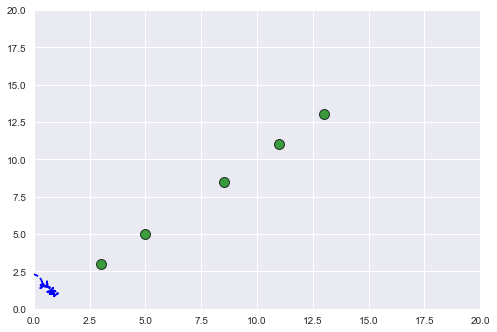

In [5]:
for i in range(1, num_episodes+1):
    state = agent.reset_episode()
    score = 0

    episode_results = {'time': [], 'x': [], 'y': [], 'theta': [], 'reward': []}

    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(state, action)
        print(reward)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        high_score = max(high_score, score)
        low_score = min(low_score, score)

    # track the results for offline analysis
    
        episode_results['time'].append(task.sim.time)
        episode_results['x'].append(state[0])
        episode_results['y'].append(state[1])
        episode_results['theta'].append(state[2])
        episode_results['reward'].append(reward)

        if done:
            print("\rEpisode = {:4d}, score = {:7.3f}, low score = {:7.3f}, high score = {:7.3f}, x_pos = {:7.3f}, y_pos = {:7.3f}".format(i, score, low_score, high_score, state[0], state[1]), end="\n")
            task.sim.plot_trajectory(state[0], state[1], state[2], episode_results['x'], episode_results['y'], x_obs, y_obs)
            training_results['score'].append(score)
            break

        resultsAll.append(episode_results)

        sys.stdout.flush()       